# Eunchae Hong - HW 2

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import PIL.Image as Image

# we won't use these packages directly, but the function that picks colors will
import scipy
import scipy.misc
import scipy.cluster

# If you haven't yet, you may need to install scipy
#!conda install -c anaconda scipy


# NOTE: I am not expecting you to know how to write these on your own!
def quantizetopalette(silf, palette, dither=False):
    """Convert an RGB or L mode image to use a given P image's palette."""
    # refs:
    # [1] https://stackoverflow.com/questions/29433243/convert-image-to-specific-palette-using-pil-without-dithering

    silf.load()

    # use palette from reference image
    palette.load()
    if palette.mode != "P":
        raise ValueError("bad mode for palette image")
    if silf.mode != "RGB" and silf.mode != "L":
        raise ValueError(
            "only RGB or L mode images can be quantized to a palette"
            )
    im = silf.im.convert("P", 1 if dither else 0, palette.im)
    # the 0 above means turn OFF dithering

    # Later versions of Pillow (4.x) rename _makeself to _new
    try:
        return silf._new(im)
    except AttributeError:
        return silf._makeself(im)


def convert_image(image, ncolors = 8):
    # refs:
    # [1]: https://stackoverflow.com/questions/3241929/python-find-dominant-most-common-color-in-an-image
    image = image.convert('RGB') # can't use alpha channel
    NUM_CLUSTERS = ncolors # unnecessary re-naming
    
    ar = np.array(image) # to data
    
    shape = ar.shape
    ar = ar.reshape(np.product(shape[:2]), shape[2]).astype(float)

    print('finding ' + str(ncolors) + ' most common colors.  Note, if "ncolors" is large, this can take a while...')
    codes, dist = scipy.cluster.vq.kmeans(ar, NUM_CLUSTERS)
    print('Done finding colors! cluster centres in RGB:\n', codes)

    vecs, dist = scipy.cluster.vq.vq(ar, codes)         # assign codes
    counts, bins = np.histogram(vecs, len(codes))    # count occurrences
    
    # into a 256 palette, integer types
    reds = np.round(np.interp(np.linspace(0,255,256), np.linspace(0,NUM_CLUSTERS-1,NUM_CLUSTERS), codes[:,0])).astype('int')
    greens = np.round(np.interp(np.linspace(0,255,256), np.linspace(0,NUM_CLUSTERS-1,NUM_CLUSTERS), codes[:,1])).astype('int')
    blues = np.round(np.interp(np.linspace(0,255,256), np.linspace(0,NUM_CLUSTERS-1,NUM_CLUSTERS), codes[:,2])).astype('int')

    # palette formatting:
    myPalette = []
    for i in range(256):
        myPalette.extend( (reds[i],greens[i],blues[i]))
        
    palimage = Image.new('P', (16, 16)) # placeholder image
    palimage.putpalette(myPalette)
    newimage = quantizetopalette(image, palimage, dither=False)
    newimage = newimage.convert('RGB')
    return newimage, codes

# similar to above, but allows you to import your own RGB sequence
def convert_image_specific(image, colors = [ [255, 255, 255], [255, 0, 0], [0,0,255], [0, 0, 0] ]):
    image = image.convert('RGB') # can't use alpha channel
    NUM_CLUSTERS = len(colors) # unnecessary re-naming
    codes = np.array(colors) # unnecessary renaming
    
    # into a 256 palette, integer types
    reds = np.round(np.interp(np.linspace(0,255,256), np.linspace(0,NUM_CLUSTERS-1,NUM_CLUSTERS), codes[:,0])).astype('int')
    greens = np.round(np.interp(np.linspace(0,255,256), np.linspace(0,NUM_CLUSTERS-1,NUM_CLUSTERS), codes[:,1])).astype('int')
    blues = np.round(np.interp(np.linspace(0,255,256), np.linspace(0,NUM_CLUSTERS-1,NUM_CLUSTERS), codes[:,2])).astype('int')

    # palette formatting:
    myPalette = []
    for i in range(256):
        myPalette.extend( (reds[i],greens[i],blues[i]))
        
    palimage = Image.new('P', (16, 16)) # placeholder image
    palimage.putpalette(myPalette)
    newimage = quantizetopalette(image, palimage, dither=False)
    newimage = newimage.convert('RGB')
    return newimage, codes

# Image 1 - Pink rose with backround

In [3]:
im = Image.open("flower1.jpeg")

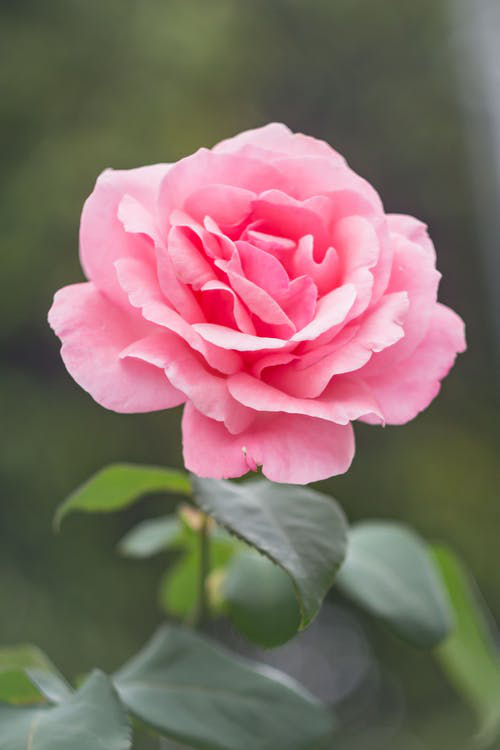

In [4]:
im

In [5]:
new_im, new_rgbs = convert_image(im, ncolors = 8)


finding 8 most common colors.  Note, if "ncolors" is large, this can take a while...
Done finding colors! cluster centres in RGB:
 [[ 82.30583093  89.05444992  67.07307728]
 [244.94214637 193.34636968 213.46175875]
 [103.23585057 116.4989222   86.49881531]
 [227.06126463  34.27928017  80.21359032]
 [242.28278105 148.34667325 179.45383789]
 [137.32067366 149.24880564 140.82230624]
 [238.65332531  99.26989381 136.2215296 ]
 [ 65.76803368  72.39431643  55.5185756 ]]


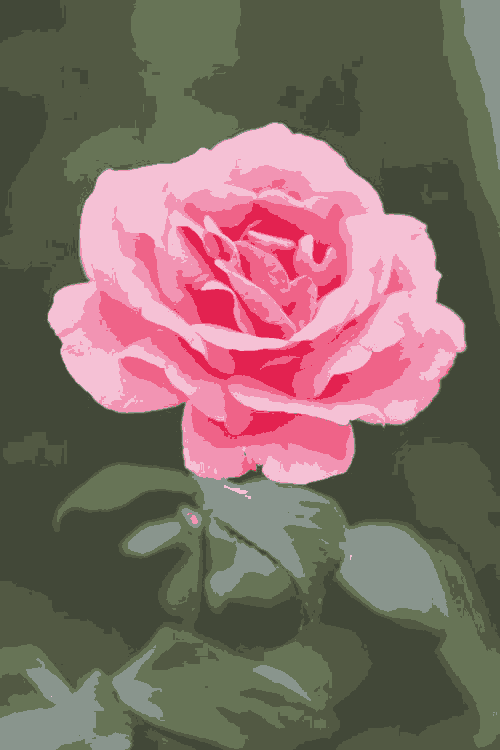

In [6]:
new_im

In [7]:
new_im_data = np.array(new_im)


In [8]:
np.unique(new_im_data.reshape(-1, new_im_data.shape[2]), axis=0)


array([[ 66,  72,  56],
       [ 82,  89,  67],
       [103, 116,  86],
       [137, 149, 141],
       [227,  34,  80],
       [239,  99, 136],
       [242, 148, 179],
       [245, 193, 213]], dtype=uint8)

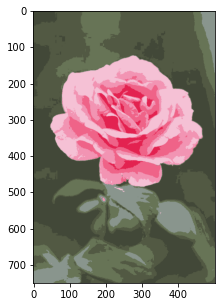

In [10]:
fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(new_im_data)
plt.show()

In [12]:
number_of_pixels_of_a_color = []
color_labels = []
color_values = []

In [15]:
unique_colors = np.unique(new_im_data.reshape(-1, new_im_data.shape[2]),axis=0)

In [16]:
unique_colors

array([[ 66,  72,  56],
       [ 82,  89,  67],
       [103, 116,  86],
       [137, 149, 141],
       [227,  34,  80],
       [239,  99, 136],
       [242, 148, 179],
       [245, 193, 213]], dtype=uint8)

In [19]:
number_of_pixels_of_a_color = []
color_labels = []
color_values = []

for icolor, rgba in enumerate(unique_colors) :
    print (icolor, rgba)


0 [66 72 56]
1 [82 89 67]
2 [103 116  86]
3 [137 149 141]
4 [227  34  80]
5 [239  99 136]
6 [242 148 179]
7 [245 193 213]


In [43]:
number_of_pixels_of_a_color = []
color_labels = []
color_values = []

for icolor, rgba in enumerate(unique_colors) :
    #print (icolor, rgba)
    
    red_mask = new_im_data[:,:,0] == rgba[0]
    green_mask = new_im_data[:,:,1] == rgba[1] 
    blue_mask = new_im_data[:,:,2] == rgba[2] 
    #alpha_mask = im_data[:,:,3] == rgba[3] 
    
    pixel_mask = red_mask & green_mask & blue_mask 
    
    npixels = len(new_im_data[pixel_mask])
    
    number_of_pixels_of_a_color.append(npixels)
    
    color_labels.append("Color #"+str(icolor))
    
    color_values.append(rgba/255)

In [44]:
number_of_pixels_of_a_color

[89744, 98201, 56718, 28117, 9450, 24996, 27528, 40246]

In [45]:
color_labels

['Color #0',
 'Color #1',
 'Color #2',
 'Color #3',
 'Color #4',
 'Color #5',
 'Color #6',
 'Color #7']

In [46]:
color_values

[array([0.25882353, 0.28235294, 0.21960784]),
 array([0.32156863, 0.34901961, 0.2627451 ]),
 array([0.40392157, 0.45490196, 0.3372549 ]),
 array([0.5372549 , 0.58431373, 0.55294118]),
 array([0.89019608, 0.13333333, 0.31372549]),
 array([0.9372549 , 0.38823529, 0.53333333]),
 array([0.94901961, 0.58039216, 0.70196078]),
 array([0.96078431, 0.75686275, 0.83529412])]

# Finally, Let's make this to a histogram!

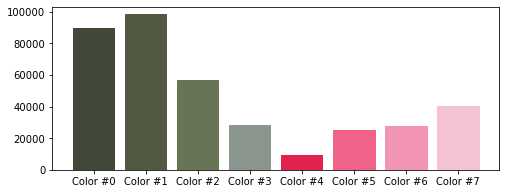

In [49]:
fig, ax = plt.subplots(figsize=(8,3))

myBarChart = ax.bar(color_labels, number_of_pixels_of_a_color)

for i in range (len(myBarChart)):
     myBarChart[i].set_color(color_values[i])
        
plt.show()

# Now, let's move on to the 2nd image

# Image 2- Red rose

In [50]:
im = Image.open("flower2.jpg")

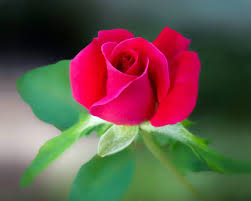

In [51]:
im

In [56]:
new_im2, new_rgbs = convert_image(im, ncolors = 8)


finding 8 most common colors.  Note, if "ncolors" is large, this can take a while...
Done finding colors! cluster centres in RGB:
 [[ 85.19266247 101.18176101 100.55115304]
 [ 19.66201315  30.58249874  20.19231158]
 [192.86562804 194.24659202 180.83349562]
 [193.11314572   2.44043948  40.8924441 ]
 [134.97298938 170.46373293 119.36206373]
 [ 52.50518337  85.51231747  53.78475086]
 [ 73.58706361 141.21492825  80.86635254]
 [234.67973856  10.9442402   97.57352941]]


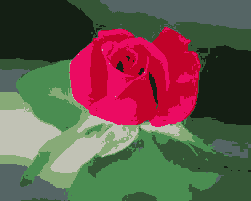

In [57]:
new_im2

In [59]:
new_im2_data = np.array(new_im2)

In [60]:
np.unique(new_im2_data.reshape(-1, new_im2_data.shape[2]), axis=0)


array([[ 20,  31,  20],
       [ 53,  86,  54],
       [ 74, 141,  81],
       [ 85, 101, 101],
       [135, 170, 119],
       [193,   2,  41],
       [193, 194, 181],
       [235,  11,  98]], dtype=uint8)

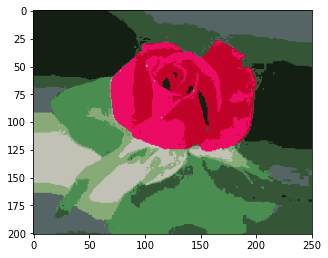

In [61]:
fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(new_im2_data)
plt.show()

In [62]:
number_of_pixels_of_a_color = []
color_labels = []
color_values = []

In [64]:
unique_colors = np.unique(new_im2_data.reshape(-1, new_im2_data.shape[2]),axis=0)

In [65]:
unique_colors

array([[ 20,  31,  20],
       [ 53,  86,  54],
       [ 74, 141,  81],
       [ 85, 101, 101],
       [135, 170, 119],
       [193,   2,  41],
       [193, 194, 181],
       [235,  11,  98]], dtype=uint8)

In [66]:
number_of_pixels_of_a_color = []
color_labels = []
color_values = []

for icolor, rgba in enumerate(unique_colors) :
    print (icolor, rgba)

0 [20 31 20]
1 [53 86 54]
2 [ 74 141  81]
3 [ 85 101 101]
4 [135 170 119]
5 [193   2  41]
6 [193 194 181]
7 [235  11  98]


In [67]:
number_of_pixels_of_a_color = []
color_labels = []
color_values = []

for icolor, rgba in enumerate(unique_colors) :
    #print (icolor, rgba)
    
    red_mask = new_im2_data[:,:,0] == rgba[0]
    green_mask = new_im2_data[:,:,1] == rgba[1] 
    blue_mask = new_im2_data[:,:,2] == rgba[2] 
    #alpha_mask = im_data[:,:,3] == rgba[3] 
    
    pixel_mask = red_mask & green_mask & blue_mask 
    
    npixels = len(new_im2_data[pixel_mask])
    
    number_of_pixels_of_a_color.append(npixels)
    
    color_labels.append("Color #"+str(icolor))
    
    color_values.append(rgba/255)

In [68]:
number_of_pixels_of_a_color

[9174, 9424, 8750, 5563, 3365, 5517, 4087, 4571]

In [69]:
color_labels

['Color #0',
 'Color #1',
 'Color #2',
 'Color #3',
 'Color #4',
 'Color #5',
 'Color #6',
 'Color #7']

In [70]:
color_values

[array([0.07843137, 0.12156863, 0.07843137]),
 array([0.20784314, 0.3372549 , 0.21176471]),
 array([0.29019608, 0.55294118, 0.31764706]),
 array([0.33333333, 0.39607843, 0.39607843]),
 array([0.52941176, 0.66666667, 0.46666667]),
 array([0.75686275, 0.00784314, 0.16078431]),
 array([0.75686275, 0.76078431, 0.70980392]),
 array([0.92156863, 0.04313725, 0.38431373])]

# Now, let's make a histogram, and see how it's different from the first rose's histrogram! 

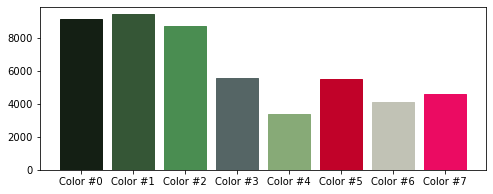

In [71]:
fig, ax = plt.subplots(figsize=(8,3))

myBarChart = ax.bar(color_labels, number_of_pixels_of_a_color)

for i in range (len(myBarChart)):
     myBarChart[i].set_color(color_values[i])
        
plt.show()

# Finally, let's see our last rose...

# Image 3 - Close-up pink rose

In [72]:
im = Image.open("flower3.jpg")

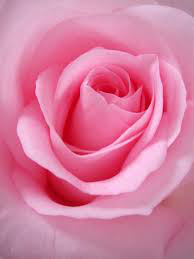

In [73]:
im

In [75]:
new_im3, new_rgbs = convert_image(im, ncolors = 8)


finding 8 most common colors.  Note, if "ncolors" is large, this can take a while...
Done finding colors! cluster centres in RGB:
 [[212.57108681 147.42834359 178.28184097]
 [244.42475661 186.49596662 220.36773296]
 [227.65738198 124.30037923 165.09742383]
 [213.00124502  61.58441235 104.03162351]
 [182.87304114 118.73420666 144.95078355]
 [228.20946978 165.48745363 197.03622082]
 [223.0292379   93.18677105 137.47435693]
 [192.33817348  19.15934276  51.82307986]]


In [79]:
new_im3_data = np.array(new_im3)

In [80]:
np.unique(new_im3_data.reshape(-1, new_im3_data.shape[2]), axis=0)


array([[183, 119, 145],
       [192,  19,  52],
       [213,  62, 104],
       [213, 147, 178],
       [223,  93, 137],
       [228, 124, 165],
       [228, 165, 197],
       [244, 186, 220]], dtype=uint8)

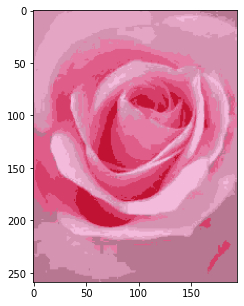

In [81]:
fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(new_im3_data)
plt.show()

In [82]:
number_of_pixels_of_a_color = []
color_labels = []
color_values = []

In [84]:
unique_colors = np.unique(new_im3_data.reshape(-1, new_im3_data.shape[2]),axis=0)

In [85]:
unique_colors

array([[183, 119, 145],
       [192,  19,  52],
       [213,  62, 104],
       [213, 147, 178],
       [223,  93, 137],
       [228, 124, 165],
       [228, 165, 197],
       [244, 186, 220]], dtype=uint8)

In [86]:
number_of_pixels_of_a_color = []
color_labels = []
color_values = []

for icolor, rgba in enumerate(unique_colors) :
    print (icolor, rgba)

0 [183 119 145]
1 [192  19  52]
2 [213  62 104]
3 [213 147 178]
4 [223  93 137]
5 [228 124 165]
6 [228 165 197]
7 [244 186 220]


In [87]:
number_of_pixels_of_a_color = []
color_labels = []
color_values = []

for icolor, rgba in enumerate(unique_colors) :
    #print (icolor, rgba)
    
    red_mask = new_im3_data[:,:,0] == rgba[0]
    green_mask = new_im3_data[:,:,1] == rgba[1] 
    blue_mask = new_im3_data[:,:,2] == rgba[2] 
    #alpha_mask = im_data[:,:,3] == rgba[3] 
    
    pixel_mask = red_mask & green_mask & blue_mask 
    
    npixels = len(new_im3_data[pixel_mask])
    
    number_of_pixels_of_a_color.append(npixels)
    
    color_labels.append("Color #"+str(icolor))
    
    color_values.append(rgba/255)

In [88]:
number_of_pixels_of_a_color

[7399, 2192, 4735, 11627, 6831, 6095, 8118, 3249]

In [89]:
 color_labels

['Color #0',
 'Color #1',
 'Color #2',
 'Color #3',
 'Color #4',
 'Color #5',
 'Color #6',
 'Color #7']

In [90]:
color_values

[array([0.71764706, 0.46666667, 0.56862745]),
 array([0.75294118, 0.0745098 , 0.20392157]),
 array([0.83529412, 0.24313725, 0.40784314]),
 array([0.83529412, 0.57647059, 0.69803922]),
 array([0.8745098 , 0.36470588, 0.5372549 ]),
 array([0.89411765, 0.48627451, 0.64705882]),
 array([0.89411765, 0.64705882, 0.77254902]),
 array([0.95686275, 0.72941176, 0.8627451 ])]

# Finally, let's make a histogram, and see how it differentiate from others

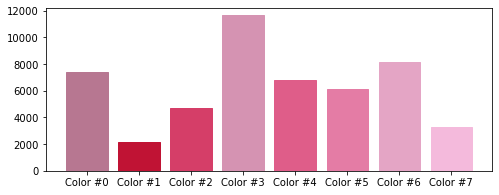

In [91]:
fig, ax = plt.subplots(figsize=(8,3))

myBarChart = ax.bar(color_labels, number_of_pixels_of_a_color)

for i in range (len(myBarChart)):
     myBarChart[i].set_color(color_values[i])
        
plt.show()

Conclusion: From this assignment, I learned the same representation of roses can have very different RGBA colors, and especially, it was interesting to see how the programming captures the unqiue colors when I make them into a bar chart. 

In particular, for the last rose image, I thought there is going to be less than 8 unique colors, since from my eyes, I was able to catch only about 4 colors. However, it turns out there are a wide range of pink colors that I could not detect myself. It was extremly interesting and impressive to see that how it captures images' unique colors, and it felt so great to see those colors into a bar graph when I did it right!

** More narrative will be attached with a seprate file**